In [2]:
%run Data_new.ipynb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

oryginal_isotherms: 926
oryginal_bet: 926
oryginal_info: 926 



In [3]:

size = 40
X,y,info,oryginal = get_data(size,flat=True);
y_all_nested = []
for i in range(len(y)):
    y_all_nested.append([y[i],info[i]])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_nested, y_test_nested, = train_test_split(X, y_all_nested, test_size=0.01, random_state=80) #random_state=42
y_train = [item[0] for item in y_train_nested]
y_train = np.array(y_train).astype(float)
y_test = [item[0] for item in y_test_nested]
y_test = np.array(y_test).astype(float)
# print(y_train)
# X_train = X_train.reshape(X_train.shape[0], -1)
# print(X[0])
#for n in X[0]:
#    print(n)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train[0])
print(len(X_train))
print(len(X_test))

flat=True, returned one dimension data
X (926, 80)
y (926,)
info 926
oryginal_isotherms 926
return: X, y, info, oryginal_isotherms
916
10


In [4]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
epochs_number = 300



model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(size)),  
    tf.keras.layers.Dense(size, activation='relu'), 
    tf.keras.layers.Dense(20, activation='relu'), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(1)                      
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics=['mae', 'mse']
model.compile(optimizer=optimizer, loss='mae', metrics=metrics)
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history  =  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)
history  =  model.fit(X_train, y_train, epochs=epochs_number, batch_size=10,validation_split=0.1, verbose=2)
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")


Epoch 1/300


I0000 00:00:1734428689.265195  137765 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10211 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:09:00.0, compute capability: 7.5
I0000 00:00:1734428690.360389  137997 service.cc:148] XLA service 0x7c5f100098f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734428690.360430  137997 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-12-17 10:44:50.389795: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734428690.507973  137997 cuda_dnn.cc:529] Loaded cuDNN version 90600
I0000 00:00:1734428691.010396  137997 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 - 3s - 33ms/step - loss: 1023.4732 - mae: 1023.4732 - mse: 1480291.8750 - val_loss: 1075.3325 - val_mae: 1075.3325 - val_mse: 1621631.0000
Epoch 2/300
83/83 - 0s - 2ms/step - loss: 800.6434 - mae: 800.6434 - mse: 931175.0000 - val_loss: 546.6290 - val_mae: 546.6290 - val_mse: 469112.7812
Epoch 3/300
83/83 - 0s - 2ms/step - loss: 495.1200 - mae: 495.1200 - mse: 359398.5625 - val_loss: 503.8344 - val_mae: 503.8344 - val_mse: 401248.2188
Epoch 4/300
83/83 - 0s - 2ms/step - loss: 469.0811 - mae: 469.0811 - mse: 331909.1562 - val_loss: 478.1276 - val_mae: 478.1276 - val_mse: 367011.8750
Epoch 5/300
83/83 - 0s - 2ms/step - loss: 436.7193 - mae: 436.7193 - mse: 291319.7188 - val_loss: 442.4755 - val_mae: 442.4755 - val_mse: 335703.3750
Epoch 6/300
83/83 - 0s - 2ms/step - loss: 394.3014 - mae: 394.3014 - mse: 258989.4375 - val_loss: 390.6151 - val_mae: 390.6151 - val_mse: 302631.0938
Epoch 7/300
83/83 - 0s - 2ms/step - loss: 360.8684 - mae: 360.8684 - mse: 232799.5156 - val_loss: 372.407

In [5]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")

Metrics: [130.63714599609375, 130.63714599609375, 32293.259765625]
mae = 130.63714599609375
mse = 32293.259765625


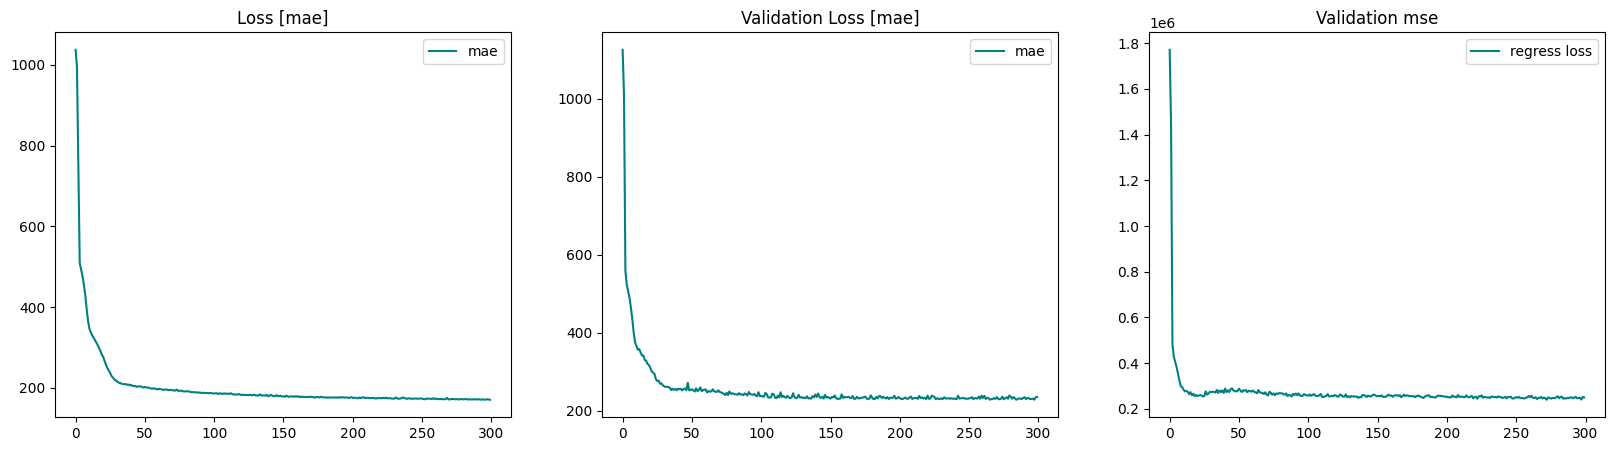

In [6]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='mae')
# ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss [mae]')
ax[0].legend()

ax[1].plot(history.history['val_loss'], color='teal', label='mae')
# ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Validation Loss [mae]')
ax[1].legend()

ax[2].plot(history.history['val_mse'], color='teal', label='regress loss')
# ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Validation mse')
ax[2].legend()

plt.show()

In [7]:
error_threshold = 50
max_error_threshold = 30
predictions = model.predict(X_test, verbose=0)
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)

print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

 przewidywana --> [704.6053]     757.2 <-- rzeczyswista     blad: [52.59471436]  ['Data56', 'ACM(1-1)700', '1']
 przewidywana --> [1910.6948]     1880.0 <-- rzeczyswista     blad: [30.69482422]  ['Data66', 'AC-r-600', '6']
 przewidywana --> [647.9613]     570.0 <-- rzeczyswista     blad: [77.96130371]  ['Data88', 'C6', '1']
 przewidywana --> [1026.5876]     986.0 <-- rzeczyswista     blad: [40.58764648]  ['Data89', 'AC-1', '2']
 przewidywana --> [600.2479]     567.22 <-- rzeczyswista     blad: [33.0279248]  ['Data82', 'AC2', '1']
 przewidywana --> [648.2693]     352.0 <-- rzeczyswista     blad: [296.26928711]  ['Data126', 'Ubtreated', '1']
 przewidywana --> [1074.7576]     785.0 <-- rzeczyswista     blad: [289.75756836]  ['Data16', 'W-AC', '4']
 przewidywana --> [305.0854]     654.0 <-- rzeczyswista     blad: [348.91461182]  ['Data69', 'D3065011', '1']
 przewidywana --> [788.954]     659.0 <-- rzeczyswista     blad: [129.95397949]  ['Data35', 'cellulose', '5']
max error: [348.91461182]

In [58]:
# model.save("model_1000.keras")

In [8]:
from tensorflow.keras.models import load_model
model_name = 'model_1000.keras'
modelos = load_model(model_name)
predictions = modelos.predict(X_test, verbose=0)

error_threshold = 50
max_error_threshold = 400
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)

print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

ValueError: File not found: filepath=model_1000.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
#  przewidywana --> [553.189]     249.0 <-- rzeczyswista     blad: [304.18903]  ['Data125', 'coconut_shells_6h', '7']
#  przewidywana --> [1967.7969]     1616.22 <-- rzeczyswista     blad: [351.5769]  ['Data153', 'GC-C04', '4']
#  przewidywana --> [1556.715]     1193.2 <-- rzeczyswista     blad: [363.515]  ['Data54', 'CZ0.65', '3']
#  przewidywana --> [1296.133]     938.0 <-- rzeczyswista     blad: [358.13306]  ['Data15', '3', '1']
#  przewidywana --> [732.7655]     1188.0 <-- rzeczyswista     blad: [455.2345]  ['Data156', 'MCAC-2-1', '4']
#  przewidywana --> [573.38586]     976.0 <-- rzeczyswista     blad: [402.61414]  ['Data47', 'ACF30M-HNO3', '3']
#  przewidywana --> [350.85513]     823.0 <-- rzeczyswista     blad: [472.14487]  ['Data86', 'ACZ3', '2']
# max error: [472.14487]  dla ['Data86', 'ACZ3', '2'] 
# for error thteshold[50] - 57.8%     100 izotermy na 173